In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def colors(n): 
    if n<4: return [[1,0,0],[0,0,1],[0,1,0]]
    ret = [] 
    r = int(random.random() * 256) 
    g = int(random.random() * 256) 
    b = int(random.random() * 256)
    for i in range(n):
        r = int(r/(n+1))/255
        g = int(g/(n+1))/255
        b = int(b/(n+1))/255
        ret.append((r,g,b))  
    return ret 

1. Membership
$$s_n = \arg\min_k ||\mathbf{x}_n-\mathbf{m}_k||$$
2. Mean Estimation
$$\mathbf{m}_k = \frac{\sum_n\mathbf{x}_n\mathbb{I}(s_n=k)}{\sum_j\mathbb{I}(s_j=K)}$$
3. Cost Function
$$C(\{s_{nk}\},\{\mathbf{m}_k\})=\sum^N_{n=1}\sum^K_{k=1}s_{nk}||\mathbf{x}_n-\mathbf{m}_k||^2$$
where $\sum_k s_{nk}=1$ and $s_{nk}\in\{0,1\}$.

### Clustering 1D samples

In [2]:
m1,m2 = -1,5
v1,v2 = 2,1
s1 = np.random.normal(m1,v1,900)
s2 = np.random.normal(m2,v2,1100)

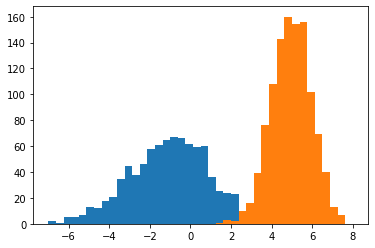

In [3]:
c1,b1,i1 = plt.hist(s1,40,range=[-7,8])
c2,b2,i2 = plt.hist(s2,40,range=[-7,8])

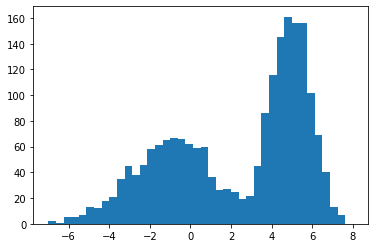

In [4]:
data = np.concatenate((s1,s2))
c,b,i = plt.hist(data,40,range=[-7,8])
# for j in range(20): i[j].set_facecolor('r')

In [5]:
def kmeans_1d(data,k=2,iters=10,seed=8):
    random.seed(seed)
    L = len(data)
    mi,ma = np.min(data),np.max(data)
    m = np.random.uniform(mi,ma,k)
    res = []
    # m = np.array([-2,8])
    for i in range(iters):
        # member estimation
        absdif = np.abs(data[:,np.newaxis]-m.reshape(1,-1))
        s = np.vstack((np.argmin(absdif,axis=1),
                      np.linspace(0,L-1,L).astype(int)))
        # cost calculation
        res.append(np.sum(absdif[s[1,:],s[0,:]]**2))
        # mean estimation
        for j in np.unique(s[0,:]):
            m[j]=np.mean(data[s[0,:]==j])
            
    # plot
    absdif = np.abs(data[:,np.newaxis]-m.reshape(1,-1))
    s = np.argmin(absdif,axis=1)
    cs = colors(k)
    plt.figure(figsize=(20,20))
    plt.subplot(2,1,1)
    for j in np.unique(s):
        plt.hist(data[s==j],40,range=[mi,ma],color=cs[j])
        plt.axvline(x=m[j],color='k')
    plt.subplot(2,1,2)
    plt.plot(range(iters),res)

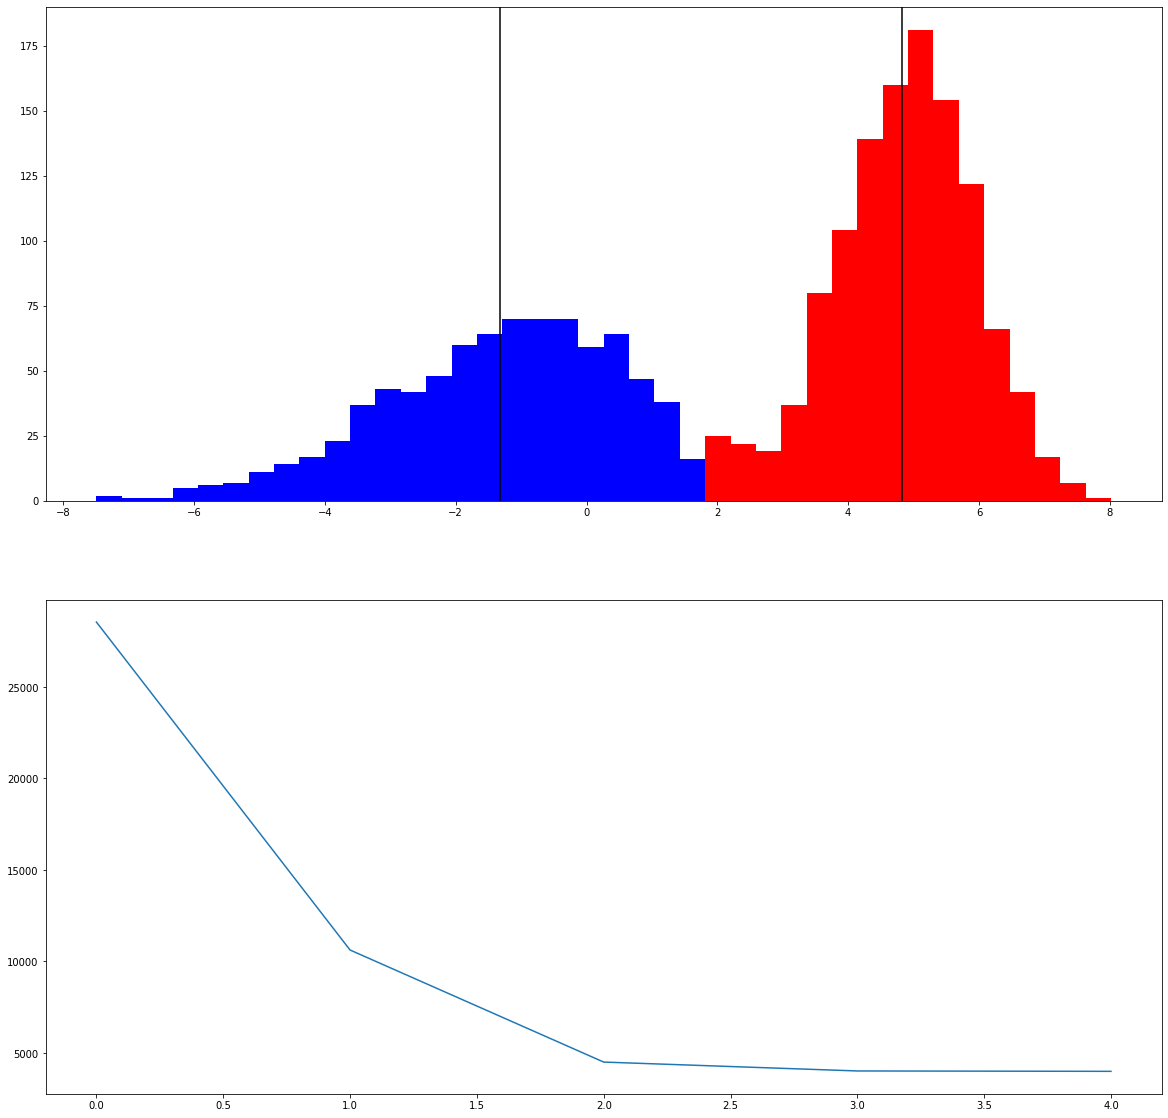

In [6]:
kmeans_1d(data,k=2,iters=5,seed=1)

### Clustering 2D samples

In [7]:
m1,m2 = np.array([10,1]),np.array([1,5])
v1,v2 = np.identity(2)*2.5,np.identity(2)*5
s1=np.random.multivariate_normal(m1,v1,1050)
s2=np.random.multivariate_normal(m2,v2,850)
data = np.vstack((s1,s2))
print(s1.shape,data.shape)

(1050, 2) (1900, 2)


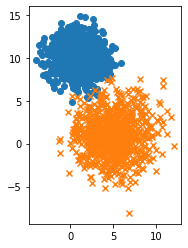

In [8]:
ax = plt.subplot(1,1,1)
plt.scatter(s1[:,1],s1[:,0])
plt.scatter(s2[:,1],s2[:,0],marker='x')
ax.set_aspect('equal')

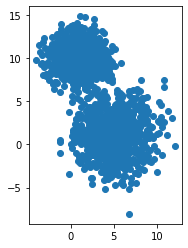

In [9]:
ax = plt.subplot(1,1,1)
plt.scatter(data[:,1],data[:,0])
ax.set_aspect('equal')

In [10]:
def kmeans_nd(data,k=2,n=2,iters=10,seed=8):
    random.seed(seed)
    L = len(data)
    mi,ma=np.min(data,axis=0),np.max(data,axis=0)
    m = np.random.uniform(mi,ma,(k,n))
    res = []
    plt.figure(figsize=(20,20))
    for i in range(iters):
        # member estimation
        sqdif = (data[:,np.newaxis]-m)**2
        sumsqdif = np.sum(sqdif,axis=-1)
        s = np.argmin(sumsqdif,axis=-1)
        s = np.vstack((s,np.linspace(0,L-1,L).astype(int)))
        # cost calculation
        res.append(np.sum(sumsqdif[s[1,:],s[0,:]])/L)
        # mean estimation
        for j in np.unique(s[0,:]):
            m[j]=np.mean(data[s[0,:]==j],axis=0)
            
        # plot
        sqdif = (data[:,np.newaxis]-m)**2
        sumsqdif = np.sum(sqdif,axis=-1)
        s = np.argmin(sumsqdif,axis=-1)
        cs = colors(k)

        ax = plt.subplot(4,3,i+1)
        for j in np.unique(s):
            tmp = data[s==j]
            plt.scatter(tmp[:,1],tmp[:,0],color=cs[j])
            ax.set_aspect('equal')
    i+=1
    ax = plt.subplot(4,3,i+1)
    plt.plot(range(iters),res)

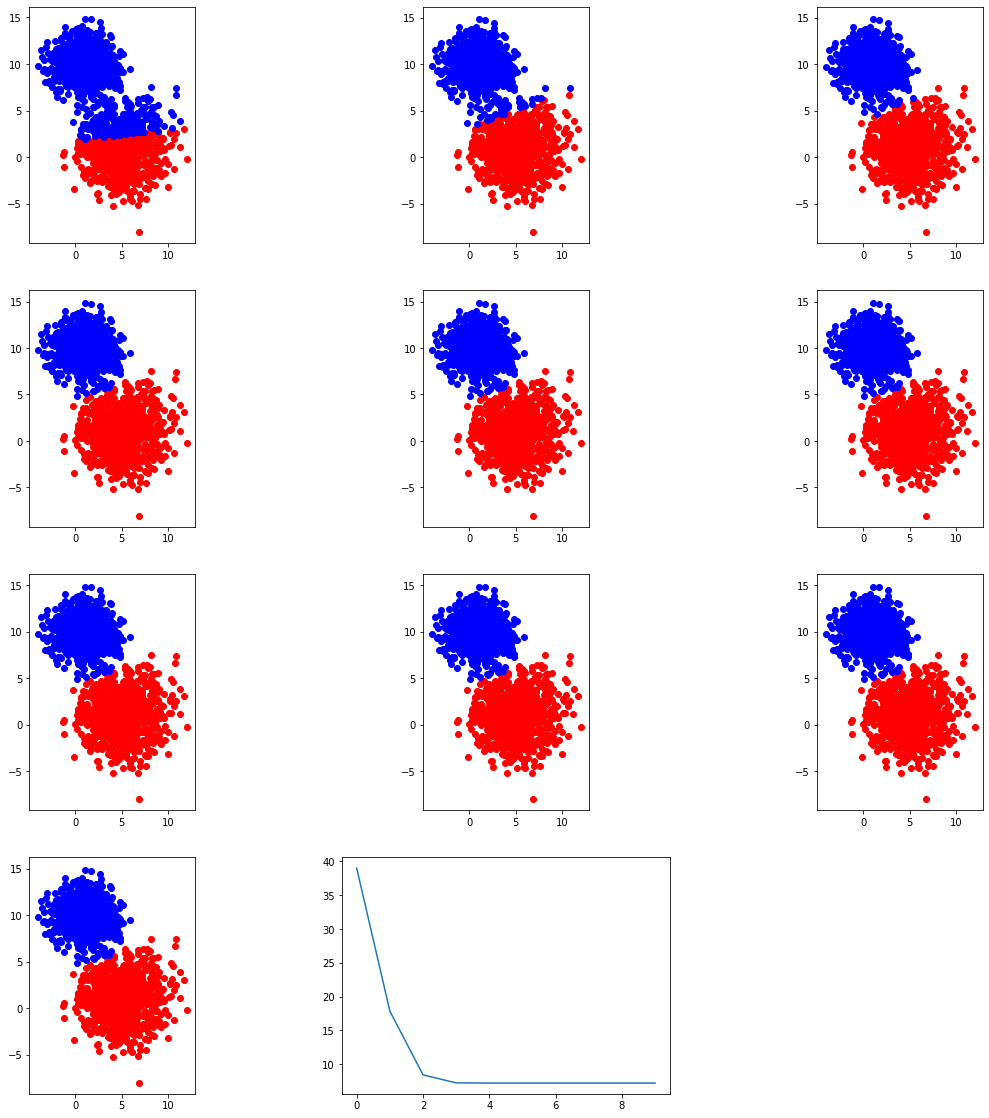

In [11]:
kmeans_nd(data,k=2,n=2,iters=10,seed=101)